In [3]:
import pandas as pd
import specq_jax as sqj
import specq_dev as sqd
import json
from pathlib import Path
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

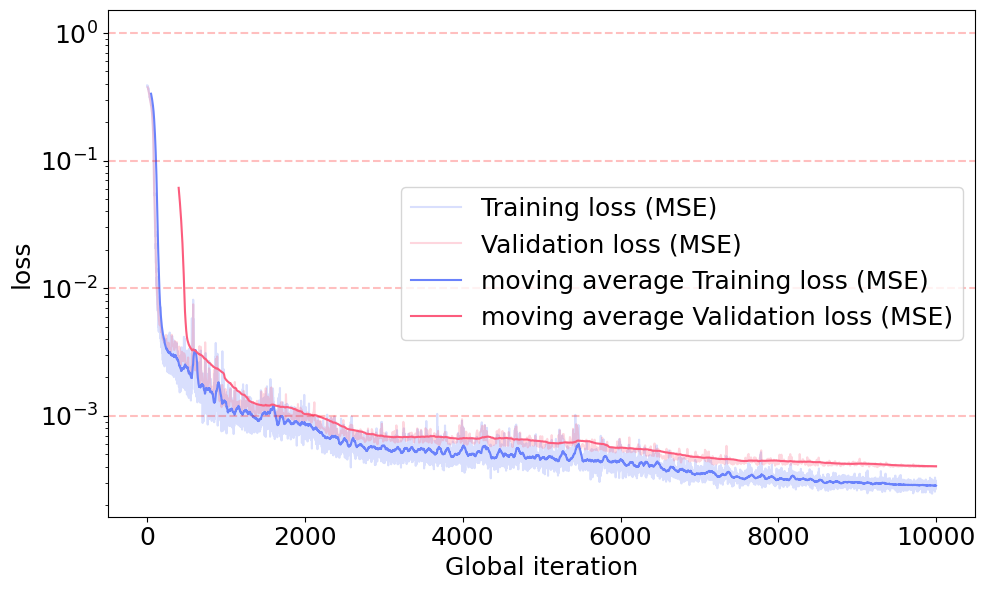

In [11]:
hist = pd.read_csv('ckpts/history.csv')
fig, ax = sqj.visualize.plot_history(hist.to_dict('records'), font_size=18)

In [4]:
# Plot horizontal line at 2e-4
ax[0].axhline(2e-4, color='r', linestyle='--')

In [7]:
fig.savefig('history_test.png', dpi=300)

In [5]:
model_path = Path("ckpts")
path = Path('./')

with open(model_path / "optimized_pulse_params.json", "r") as f:
    opt_pulse_params = json.load(f)
# Read the pulse sequence from the folder
pulse_sequence = sqj.data.pulse_reader(str(path))

(<Figure size 2000x1000 with 1 Axes>,
 <Axes: xlabel='Time (dt)', ylabel='Amplitude'>)

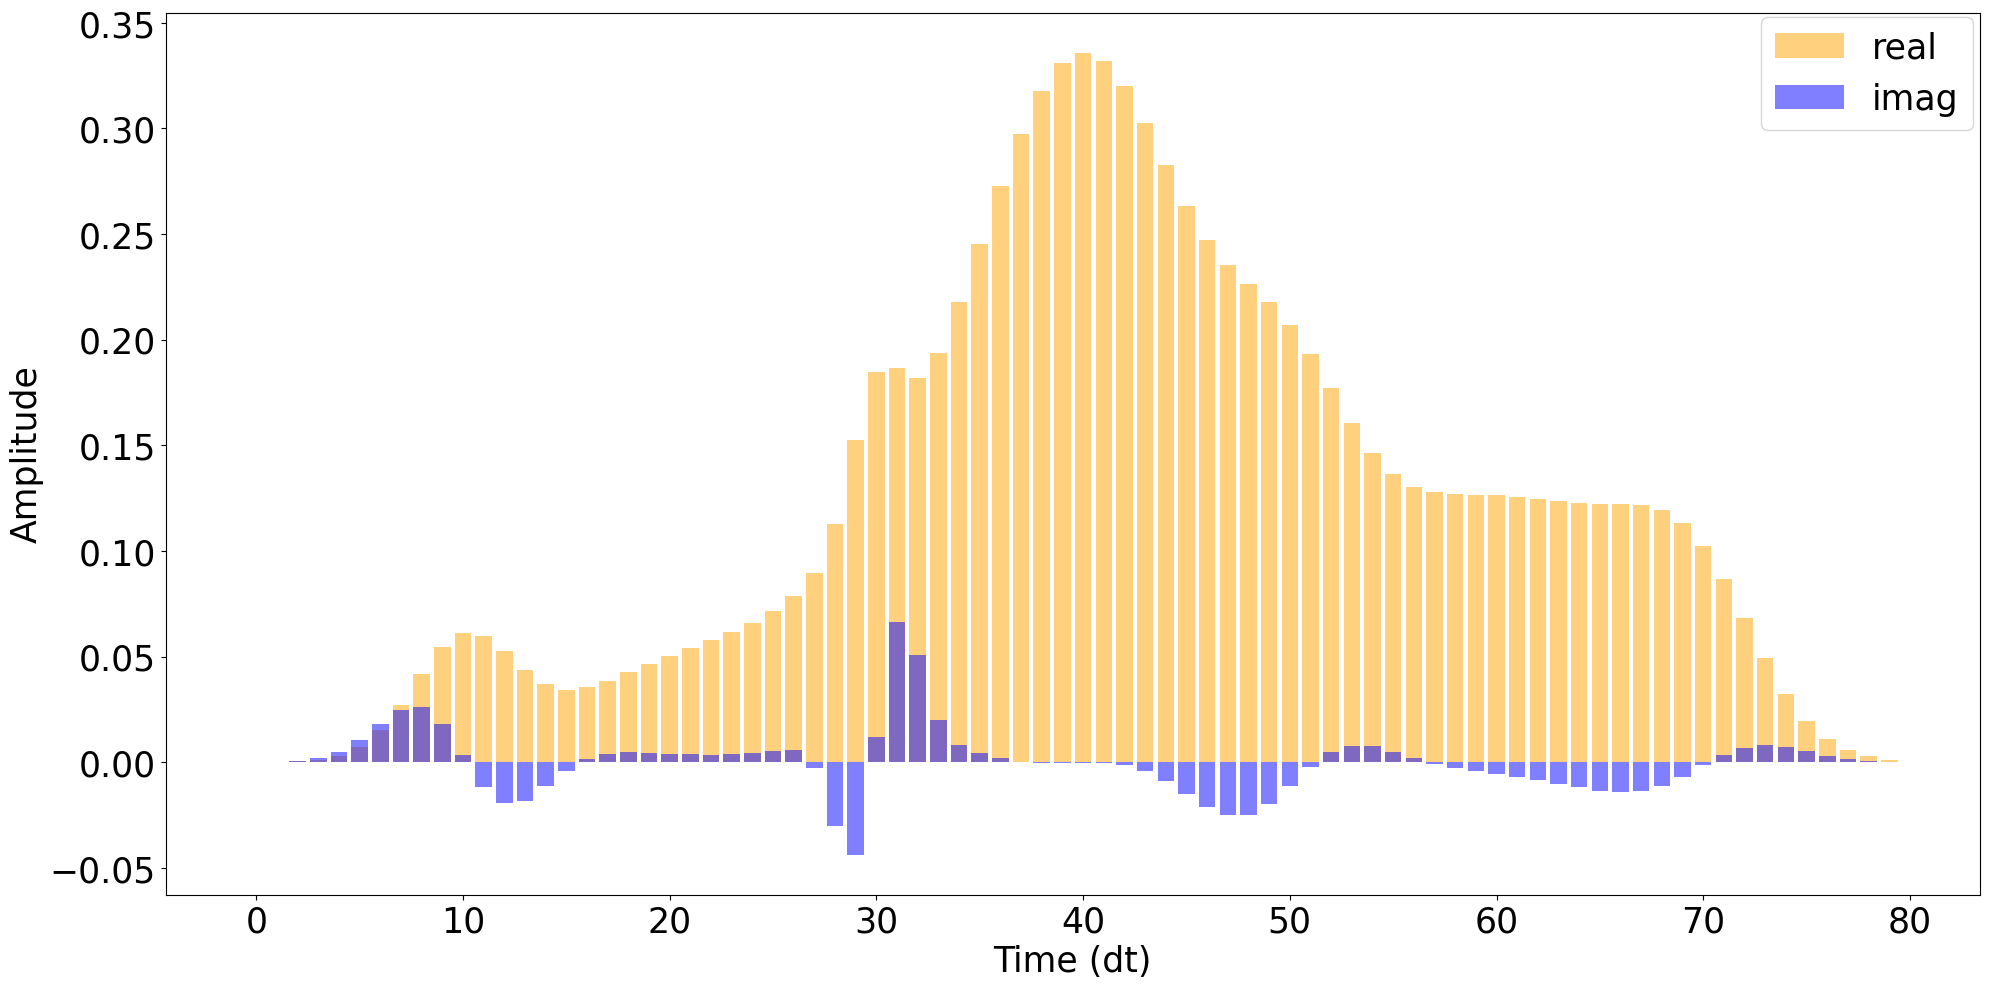

In [6]:
pulse_sequence.draw(opt_pulse_params)

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def draw_complex_pulse(waveform: np.ndarray, x_axis: np.ndarray, ax: plt.Axes = None, font_size: int = 12):

    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(20, 10))

    ax.bar(x_axis, np.real(waveform), label="real", color="orange", alpha=0.5)
    ax.bar(x_axis, np.imag(waveform), label="imag", color="blue", alpha=0.5)

    ax.set_xlabel("Time", fontsize=font_size)

    # force integer ticks
    # ax.set_xticks(x_axis)
    # Text size
    ax.tick_params(axis="both", labelsize=font_size)

    ax.set_xlabel("Time (dt)", fontsize=font_size)
    ax.set_ylabel("Amplitude", fontsize=font_size)

    ax.legend(fontsize=font_size)

    if ax is None:

        fig.tight_layout()

        return fig, ax
    else:
        return None, ax

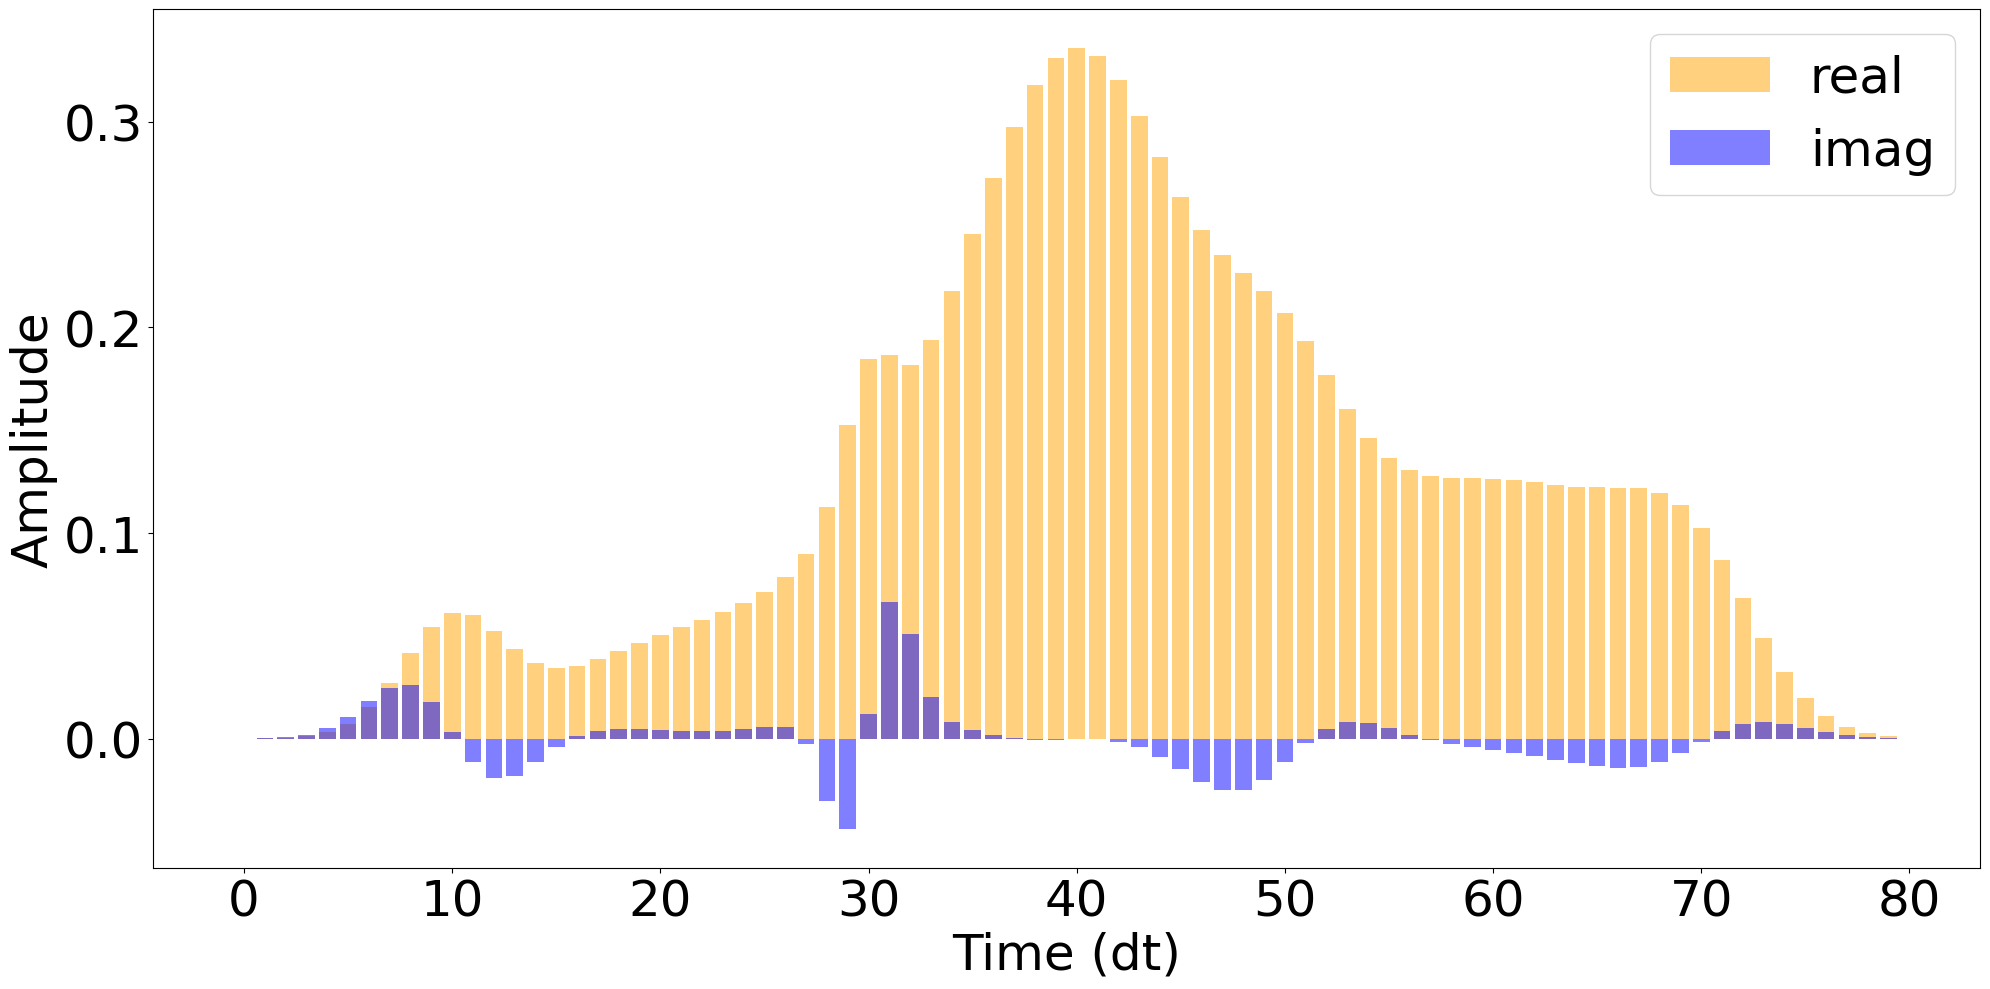

In [12]:
waveform = pulse_sequence.get_waveform(opt_pulse_params)
t_eval = np.arange(pulse_sequence.pulse_length_dt)

_ , _ = sqd.shared.draw_complex_pulse_2(waveform, t_eval, font_size=36)

In [13]:
waveform = pulse_sequence.get_waveform(opt_pulse_params)
t_eval = np.arange(pulse_sequence.pulse_length_dt)

inset_ax = inset_axes(ax[0], width="70%", height=2.0, loc="center right")

_ , _ = sqd.shared.draw_complex_pulse_2(waveform, t_eval, ax=inset_ax)

In [14]:
fig.savefig('test.png')